In [ ]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Capstone Project/content for module/Training'
VALIDATION_DIR = '/content/drive/MyDrive/Capstone Project/content for module/Testing'

In [ ]:
def train_val_generatorv(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10, 
                                     zoom_range=0.1, 
                                     width_shift_range=0.1,  
                                     height_shift_range=0.1)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150,150))
  
  return train_generator, validation_generator

In [ ]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  training_images = np.expand_dims(training_images, axis=3)
  validation_images = np.expand_dims(validation_images, axis=3)

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10, 
                                     zoom_range=0.1, 
                                     width_shift_range=0.1,  
                                     height_shift_range=0.1) 

  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=64) 

  validation_datagen = ImageDataGenerator(rescale = 1./255)

  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32) 

  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generatorv(TRAINING_DIR, VALIDATION_DIR)

Found 2290 images belonging to 10 classes.
Found 576 images belonging to 10 classes.


In [ ]:
def create_model():

  model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Flatten(),                                 
                                      tf.keras.layers.Dense(512, activation='relu'),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation='softmax')])

  model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy']) 
  
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
36/36 [==============================] - 735s 20s/step - loss: 2.3072 - accuracy: 0.1079 - val_loss: 2.2972 - val_accuracy: 0.1701
Epoch 2/30
36/36 [==============================] - 137s 4s/step - loss: 2.2667 - accuracy: 0.1594 - val_loss: 1.8838 - val_accuracy: 0.4097
Epoch 3/30
36/36 [==============================] - 135s 4s/step - loss: 1.9486 - accuracy: 0.2969 - val_loss: 1.4055 - val_accuracy: 0.5278
Epoch 4/30
36/36 [==============================] - 144s 4s/step - loss: 1.6361 - accuracy: 0.4236 - val_loss: 1.0017 - val_accuracy: 0.6753
Epoch 5/30
36/36 [==============================] - 134s 4s/step - loss: 1.3959 - accuracy: 0.5192 - val_loss: 0.7956 - val_accuracy: 0.7535
Epoch 6/30
36/36 [==============================] - 143s 4s/step - loss: 1.1572 - accuracy: 0.6026 - val_loss: 0.6654 - val_accuracy: 0.7882
Epoch 7/30
36/36 [==============================] - 145s 4s/step - loss: 1.0497 - accuracy: 0.6328 - val_loss: 0.5762 - val_accuracy: 0.8229
Epoch 8/30
3

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

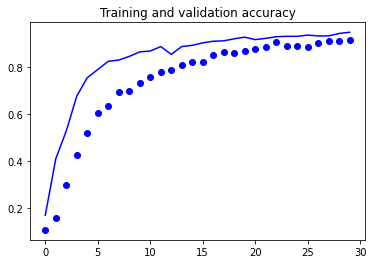

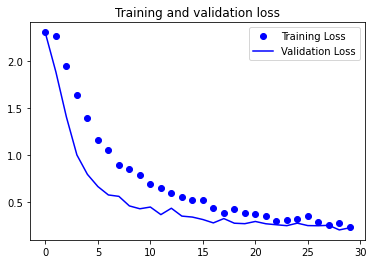

In [ ]:
plot_loss_acc(history)

In [ ]:
model.save('/content/drive/MyDrive/Capstone Project/Final Dua Saved Model/digit_model.h5')

In [ ]:
saved_model = '/content/drive/MyDrive/Capstone Project/Final Dua Saved Model/'
tf.saved_model.save(model, saved_model)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone Project/Final Dua Saved Model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone Project/Final Dua Saved Model/assets


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Capstone Project/Final Dua Saved Model/digit_model.h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model)
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('/content/drive/MyDrive/Capstone Project/Final Dua Saved Model/digit_model.tflite')
tflite_model_file.write_bytes(tflite_model)

6822340

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  image_prob = model.predict(images, batch_size=10)
  index = image_prob[0].argmax(axis=-1)
  classes = ['0', '1', '2', '3', '4', 
              '5', '6', '7', '8', '9']
  print("{} is a sign language of '{}'".format(path[-10:], classes[index]))
  print(fn)
  print(classes)

Saving WhatsApp Image 2022-06-06 at 11.41.42.jpeg to WhatsApp Image 2022-06-06 at 11.41.42.jpeg
41.42.jpeg is a sign language of '5'
WhatsApp Image 2022-06-06 at 11.41.42.jpeg
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
